# **Implementing the Gaussian Anomaly Detection Algorithm from Scratch**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X_train = np.load('X_part1.npy')

In [3]:
X_train.shape

(307, 2)

In [4]:
X_train[:5]

array([[13.04681517, 14.74115241],
       [13.40852019, 13.7632696 ],
       [14.19591481, 15.85318113],
       [14.91470077, 16.17425987],
       [13.57669961, 14.04284944]])

In [5]:
X_val = np.load('X_val_part1.npy')

In [6]:
X_val.shape

(307, 2)

In [7]:
X_val[:5]

array([[15.79025979, 14.9210243 ],
       [13.63961877, 15.32995521],
       [14.86589943, 16.47386514],
       [13.58467605, 13.98930611],
       [13.46404167, 15.63533011]])

In [8]:
y_val = np.load('y_val_part1.npy')

In [9]:
y_val.shape

(307,)

In [10]:
y_val[:5]

array([0, 0, 0, 0, 0], dtype=uint8)

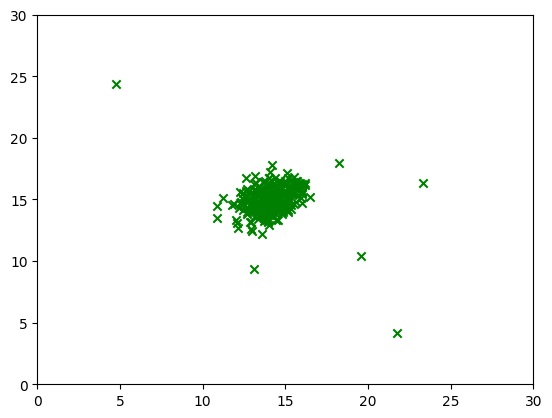

In [11]:
plt.scatter(X_train[:,0], X_train[:,1], marker='x', c='g')
plt.axis([0, 30, 0, 30])

plt.show()

In [12]:
def estimate_gaussian(X):
    m, n = X.shape
    miu = np.zeros(n)
    var = np.zeros(n)

    for j in range(n):
        total = 0
        for i in range(m):
            total += X[i, j]
        miu[j] = total / m
    
    for j in range(n):
        total = 0
        for i in range(m):
            total += (X[i, j] - miu[j]) ** 2
        var[j] = total / m

    return miu, var

In [13]:
miu, var = estimate_gaussian(X_train)

In [14]:
miu

array([14.11222578, 14.99771051])

In [15]:
var

array([1.83263141, 1.70974533])

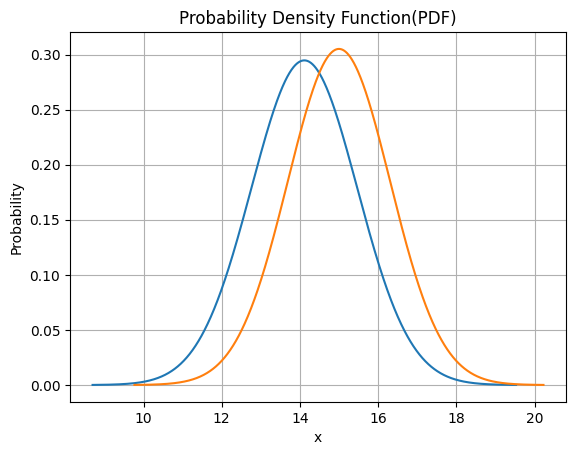

In [16]:
mean = miu       
variance = var  
sigma = np.sqrt(variance)  

x = np.linspace(mean - 4*sigma, mean + 4*sigma, 1000)
pdf = (1 / (np.sqrt(2 * np.pi * variance))) * np.exp(-((x - mean)**2) / (2 * variance))


plt.plot(x, pdf)
plt.title('Probability Density Function(PDF)')
plt.xlabel('x')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

In [17]:
def multivariate_gaussian_pdf(X, miu, var):
    
    k = len(miu)
    
    if var.ndim == 1:
        var = np.diag(var)
        
    X = X - miu
    p = (2* np.pi)**(-k/2) * np.linalg.det(var)**(-0.5) * \
        np.exp(-0.5 * np.sum(np.matmul(X, np.linalg.pinv(var)) * X, axis=1))
    
    return p

In [18]:
def select_threshold(y_val, p_val):
    best_epsilon = None
    best_F1 = 0
    F1 = 0

    step_size = (max(p_val) - min(p_val)) / 1000

    for epsilon in np.arange(min(p_val), max(p_val), step_size):
        tp = 0
        fp = 0
        fn = 0
        
        for i in range(len(p_val)):
            label = None
            if p_val[i] < epsilon:
                label = 1
            else:
                label = 0
            
            if (label == 1) and (y_val[i] == 1):
                tp += 1
            
            if (label == 1) and (y_val[i] == 0):
                fp += 1
                
            if (label == 0) and (y_val[i] == 1):
                fn += 1
        
        prec = tp / (tp + fp) if (tp + fp) != 0 else 0.0
        
        rec  = tp / (tp + fn) if (tp + fn) != 0 else 0.0
        
        F1 = (2 * prec * rec) / (prec + rec) if (prec + rec) != 0 else 0.0
        
        if F1 > best_F1:
            best_F1 = F1
            best_epsilon = epsilon
        
    return best_epsilon, best_F1 

In [19]:
p_val = multivariate_gaussian_pdf(X_val, miu, var)
epsilon, F1 = select_threshold(y_val, p_val)

print('Best epsilon: %e' % epsilon)
print('Best F1: %f' % F1)

Best epsilon: 8.990853e-05
Best F1: 0.875000


In [20]:
outliers = p_val < epsilon

In [21]:
outliers.sum()

np.int64(7)